In [1]:
import random
import numpy as np
import random
from scipy.stats import multivariate_normal

### サンプルデータの生成

In [2]:
N = 1000
X = np.linspace(-1, 1, N).reshape(N, 1)
y = []
sigma = 0.2
for xi in X:
#     if xi < 0:
    if random.randint(0, 1) == 0:
        y.append(-1*xi + random.gauss(0, sigma))
    else:
        y.append(1*xi + random.gauss(0, sigma))
y = np.array(y)

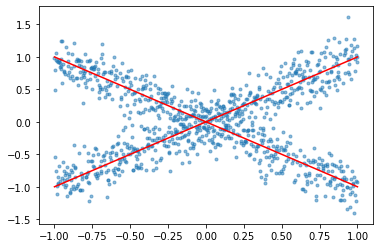

In [30]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6, 4)
import matplotlib.pyplot as plt
plt.scatter(X, y, alpha=0.5, marker='.')
plt.plot(X, -1*X, color='r')
plt.plot(X, X, color='r')

In [4]:
import sys
sys.path.append('../')

In [5]:
from linear_regression_mixtures import LinearRegressionMixturesEM
model = LinearRegressionMixturesEM(K=2, max_iter=10)

In [6]:
model.fit(X, y)

In [7]:
pred = model.predict(X)

### 予測値

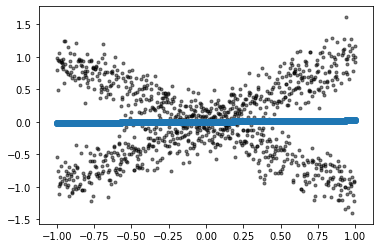

In [24]:
matplotlib.rcParams['figure.figsize'] = (6, 4)
plt.scatter(X, y, alpha=0.5, marker='.', color='k')
plt.scatter(X, pred)

###  予測分布

In [11]:
nx, ny = 100, 100
gx = np.linspace(-1, 1, nx)
gy = np.linspace(-2, 2, ny)
gz = np.zeros(shape=(ny, nx))
for xi in range(nx):
    f = model.predictive_distribution(np.array([gx[xi]]))
    for yi in range(ny):
        gz[yi, xi] = f(gy[yi])

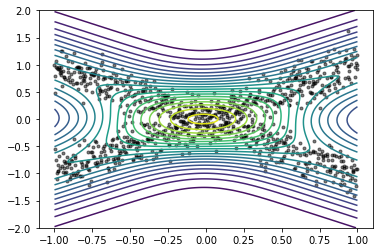

In [22]:
plt.scatter(X, y, alpha=0.5, marker='.', color='k')
plt.contour(gx, gy, gz, levels=20)